### 출처:  도서 <생활 속 예제로 배우는 생생 데이터 분석>  조인석 저


# 전 세계 개발자 현황 분석


### 프로젝트 개요

이번 실습에서는 데이터를 취합하고 집계하는 과정에 초점을 맞춰보자. 
이번에는 한 대학생이 소프트웨어 엔지니어가 되기 위해 엔지니어 개발자가 많이 활동하는 국가와 유행하는 소프트웨어 기술이 무엇인지 알아보길 원하는 상황을 가정하고, 데이터를 수집하여 그래프로 나타내어 보자.
이러한 경우 데이터는 자동으로 수집하기 무척 어렵다. 그러나 커뮤니티 기반의 생태계를 활용한다면 생각보다 쉽게 데이터를 확보할 수 있다.

### 데이터 수집

개발자 설문 조사 결과 검색을 위하여 'developer survey result'를 구글에 검색해보자. 그러면 스택오버플로 웹사이트를 상단에서 확인해 볼 수 있을 것이다. 스택오버플로는 현재 전 세계 소프트웨어 엔지니어들이 가장 많이 사용하는 웹사이트이다. 이 웹사이트에서는 매년 사용자 대상으로 설문 조사를 진행하고 결과를 공유하고 있으므로 이 사이트를 활용한다면 우리가 원하는 데이터를 구할 수 있다.
해당 페이지를 열고 2022년 메뉴 아래에 있는 <Download Full Data Set(CSV)> 링크를 클릭하여 데이터 파일을 다운로드 받자. 이 중 우리가 불러올 파일은 survey_result_public.csv 이다.

In [26]:
# 판다스 라이브러리 탑재
import pandas as pd

# csv 파일 읽어오기
raw_data = pd.read_csv("../sangsangdata/survey_results_public.csv")

# 데이터 확인하기
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ResponseId                    83439 non-null  int64  
 1   MainBranch                    83439 non-null  object 
 2   Employment                    83323 non-null  object 
 3   Country                       83439 non-null  object 
 4   US_State                      14920 non-null  object 
 5   UK_Country                    4418 non-null   object 
 6   EdLevel                       83126 non-null  object 
 7   Age1stCode                    83243 non-null  object 
 8   LearnCode                     82963 non-null  object 
 9   YearsCode                     81641 non-null  object 
 10  YearsCodePro                  61216 non-null  object 
 11  DevType                       66484 non-null  object 
 12  OrgSize                       60726 non-null  object 
 13  C

### 데이터 정제 및 가공

데이터를 파악하기 위해 일부 데이터를 확인해보자. 설문 조사의 각 질문은 열로, 설문에 대한 응답은 행으로 이뤄져 있다는걸 확인할 수 있다.

In [27]:
raw_data.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


화면상의 제약으로 열이 모두 출력되지 않고 일부만 출력된 것을 확인 할 수 있다. 따라서 우리가 필요한 열만 추출해보자.

In [28]:
# 필요한 열 추출
revised_data = raw_data[["Age","Country","LanguageHaveWorkedWith","LearnCode"]]

# 일부값 확인
revised_data.head()

,Age,Country,LanguageHaveWorkedWith,LearnCode
0,25-34 years old,Slovakia,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Coding Bootcamp;Other online resources (ex: vi...
1,18-24 years old,Netherlands,JavaScript;Python,"Other online resources (ex: videos, blogs, etc..."
2,18-24 years old,Russian Federation,Assembly;C;Python;R;Rust,"Other online resources (ex: videos, blogs, etc..."
3,35-44 years old,Austria,JavaScript;TypeScript,NaN
4,25-34 years old,United Kingdom of Great Britain and Northern I...,Bash/Shell;HTML/CSS;Python;SQL,Friend or family member


확인해보면 간혹 값을 알 수 없다는 의미의 Nan 데이터도 있다.

먼저 Age 열의 데이터를 확인해보자. 83,438개의 데이터에 응답자가 선택한 연령대 값이 보인다.

In [30]:
revised_data["Age"]

0        25-34 years old
1        18-24 years old
2        18-24 years old
3        35-44 years old
4        25-34 years old
              ...       
83434    25-34 years old
83435    18-24 years old
83436    25-34 years old
83437    25-34 years old
83438    18-24 years old
Name: Age, Length: 83439, dtype: object

이 중에서 응답자들이 선택한 연령대의 종류를 확인해보자. 다음 소스 코드와 같이 drop_duplicates() 메서드를 활용하여 중복된 값을 제거해보자.

In [31]:
# 중복값 삭제하기
revised_data["Age"].drop_duplicates()

0         25-34 years old
1         18-24 years old
3         35-44 years old
6       Prefer not to say
14        45-54 years old
15     Under 18 years old
47      65 years or older
105       55-64 years old
149                   NaN
Name: Age, dtype: object

이제 집계를 해보자. 데이터 프레임의 값을 집계하기 위해 데이터를 그룹화하는 메서드는 groupby()이다. 다음 소스코드를 실행하면 DataFrameGroupBy 객체가 반환된다.

In [32]:
# 연령대 데이터 그룹화하기
revised_data.groupby(["Age"])

반환된 객체에서 사용할 수 있는 메서드의 종류를 확인해보자. 다음과 같이 소스코드를 입력한 후 (.) 기호를 입력한 뒤 tab을 누르고 기다리면 호출할 수 있는 메서드의 리스트가 나타난다.

In [33]:
revised_data.groupby(["Age"]).size

<bound method GroupBy.size of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7f05789d4bb0>>

위에서 예시로 사용해봤듯이 메서드 중 그룹의 크기를 계산하는 기능을 하는 size()메서드를 활용해보자. 메서드를 실행하면 데이터 값이었던 연령대 정보가 색인으로 이동해 그룹을 형성하고 있는것을 볼 수 있을것이다.

In [34]:
# 연령대 그룹별 크기 확인하기
size_by_age = revised_data.groupby(["Age"]).size()
size_by_age

Age
18-24 years old       20993
25-34 years old       32568
35-44 years old       15183
45-54 years old        5472
55-64 years old        1819
65 years or older       421
Prefer not to say       575
Under 18 years old     5376
dtype: int64

동일한 방식으로 국가별 응답숫자도 확인해보자.

In [35]:
# 국가별 그룹별 크기 확인하기
size_by_country = revised_data.groupby(["Country"]).size()
size_by_country

Country
Afghanistan                              65
Albania                                  73
Algeria                                  46
Andorra                                  12
Angola                                   27
                                       ... 
Venezuela, Bolivarian Republic of...    104
Viet Nam                                386
Yemen                                    20
Zambia                                   22
Zimbabwe                                 36
Length: 181, dtype: int64

###  데이터 시각화

우선 연령대별 응답자 수를 선 그래프, 수직 막대 그래프, 수평 막대 그래프로 각각 표현해보자. 

<AxesSubplot:xlabel='Age'>

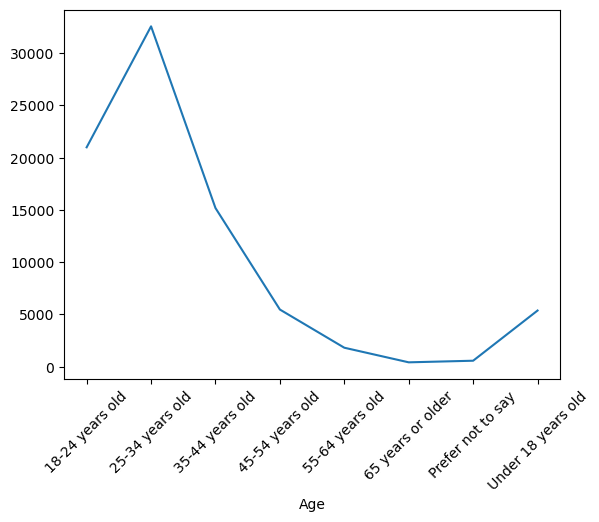

In [36]:
# 선 그래프 그리기
size_by_age.plot.line(rot=45)

위의 그래프는 연령대별 숫자를 확인하기가 조금 불편해보이고, 또한 연령대가 낮은 그룹에서 높은 그룹 순으로 위에서 아래로 나열되는 형태로 표현하고 싶다. 이를 구현하기 위해 연령대 정보를 y축으로 옮기고 응답 숫자를 x축에 표현하는 수평 막대 그래프를 그려보자. 더불어 학습을 위해 수직 막대 그래프도 한번 구현해보자.

<AxesSubplot:xlabel='Age'>

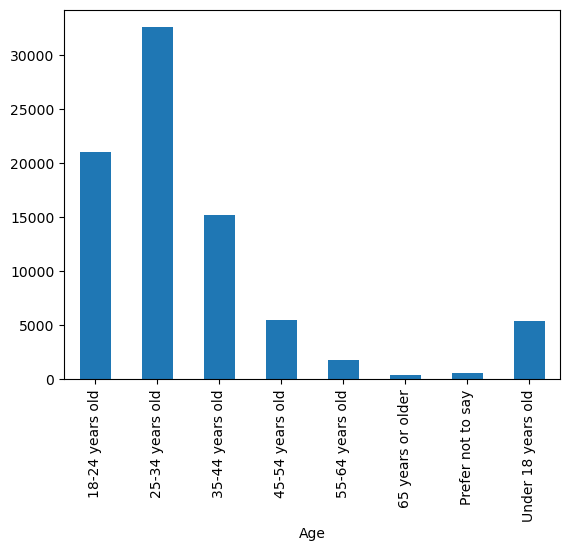

In [37]:
# 수직 막대 그래프 그리기
size_by_age.plot.bar()

<AxesSubplot:ylabel='Age'>

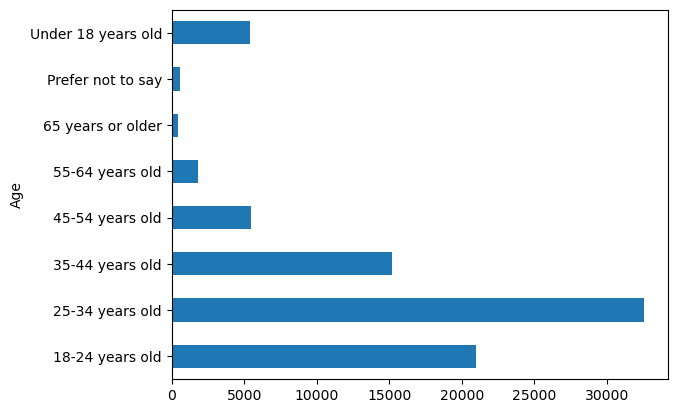

In [38]:
# 수평 막대 그래프 그리기
size_by_age.plot.barh()

위의 실행 결과를 보면 그룹 이름이 연령대별이 아니라 문자 우선 순위 기반으로 정렬되어 있다. 연령대가 가장 낮은 under 18 years old 그룹이 제일 위에, 값이 없거나 응답을 거부한 prefer not to say 그룹이 제일 아래에 위치하도록 조정해보자.

In [39]:
# 현재 색인 확인하기
size_by_age.index

Index(['18-24 years old', '25-34 years old', '35-44 years old',
       '45-54 years old', '55-64 years old', '65 years or older',
       'Prefer not to say', 'Under 18 years old'],
      dtype='object', name='Age')

In [44]:
# 재색인 하기(그래프 하단에서 상단 순으로)
reindexed_size_by_age = size_by_age.reindex(index=[
    'Prefer not to say',
    '65 years or older',
    '55-64 years old',
    '45-54 years old',
    '35-44 years old',
    '25-34 years old',
    '18-24 years old',
    'Under 18 years old'
    ])

# 재색인 결과 확인하기
reindexed_size_by_age

Age
Prefer not to say       575
65 years or older       421
55-64 years old        1819
45-54 years old        5472
35-44 years old       15183
25-34 years old       32568
18-24 years old       20993
Under 18 years old     5376
dtype: int64

이제 재색인한 데이터프레임으로 수평 막대그래프를 다시 그려보자.

<AxesSubplot:ylabel='Age'>

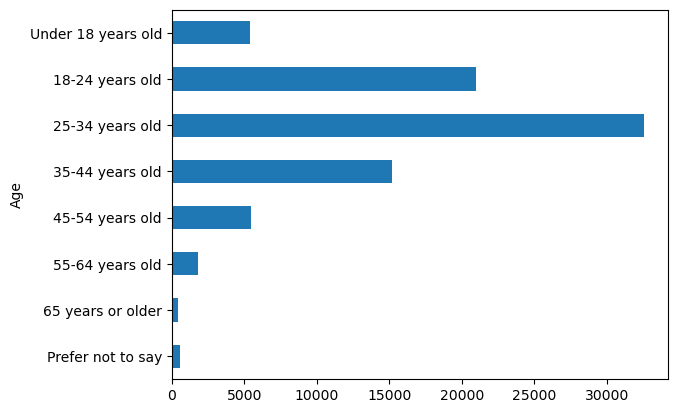

In [45]:
# 수평 그래프 다시 그리기
reindexed_size_by_age.plot.barh()

이번에는 국가별 응답자 수를 그래프로 표현해보자. 전체 응답자의 국가별 분포를 효과적으로 확인하기 위해 파이 그래프를 선택해보자. 파이 그래프는 전체에서 각 항목이 차지하는 비중을 쉽게 확인할 수 있기 때문이다.

<AxesSubplot:ylabel='None'>

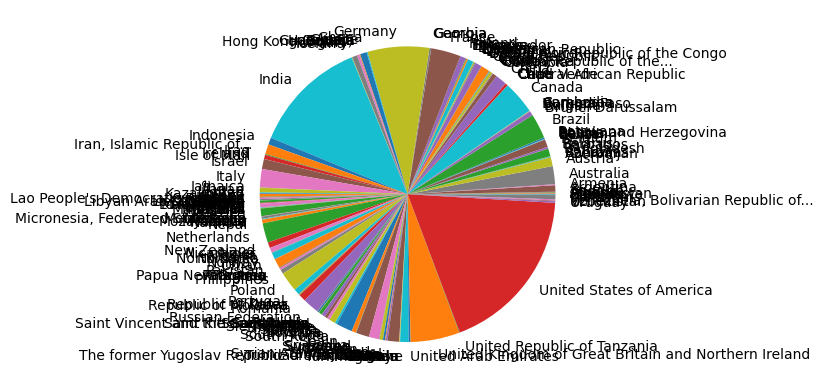

In [46]:
# 기본 파이 그래프 그리기
size_by_country.plot.pie()

위에서 확인할 수 있듯이 기본 설정 그대로 파이 그래프를 그리면 다음과 같은 단점이 보인다.
- 원이 너무 작다
- 나라가 너무 많아서 이름이 겹쳐 출력된다
- 파이가 너무 작게 쪼개져서 크기를 비교하기가 어렵다

따라서 이 문제점들을 해결하는 방향으로 그래프를 수정해 보자.

판다스 공식문서를 확인해보면 pie() 메서드 인수로 **kwargs를 찾을 수 있다. 이는 키와 값으로 이루어진 딕셔너리를 의미한다. 그 인수중 figsize의 내용을 확인해보면 figsize에 인치로 표기한 너비(width), 높이(height)로 구성한 튜플을 넣는다는 설명이 나와있다.

figsize : a tuple(width, height) in inches

따라서 다음 소스코드를 실행하여 파이 그래프를 조정해보자.

<AxesSubplot:ylabel='None'>

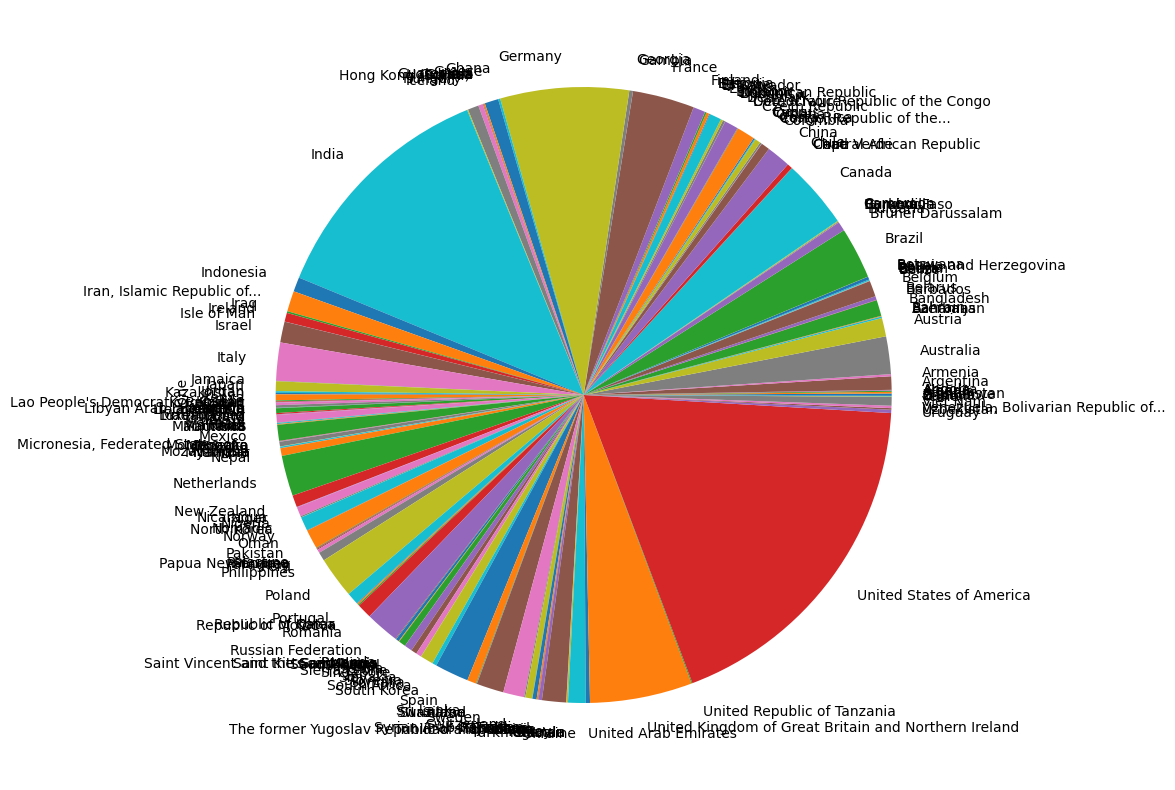

In [47]:
# 파이 그래프 크기 조정하기
size_by_country.plot.pie(figsize=(10,10))

그래프 전체 크기는 커졌지만 여전히 국가 이름은 식별이 어렵다. 게다가 파이 조각이 너무 작게 쪼개져있다. 이번 실습에서 국가 정보를 확인하는 목적은 개발자가 많이 활동하는 국가를 알기 위해서이므로 전체 국가를 표기할 필요는 없다. 따라서 개발자가 많은 상위 국가 20개국만 표기해보자. 데이터 프레임에서 상위 N개 데이터를 추출하는 메서드는 nlargest(N)이다.

In [48]:
# 국가 상위 20개 확인하기
size_by_country.nlargest(20)

Country
United States of America                                15288
India                                                   10511
Germany                                                  5625
United Kingdom of Great Britain and Northern Ireland     4475
Canada                                                   3012
France                                                   2708
Brazil                                                   2254
Poland                                                   1805
Netherlands                                              1772
Italy                                                    1666
Australia                                                1646
Spain                                                    1485
Russian Federation                                       1474
Sweden                                                   1196
China                                                    1055
Turkey                                                   1054


이제 위의 정보를 토대로 파이 그래프를 다시 그려보자.

<AxesSubplot:ylabel='None'>

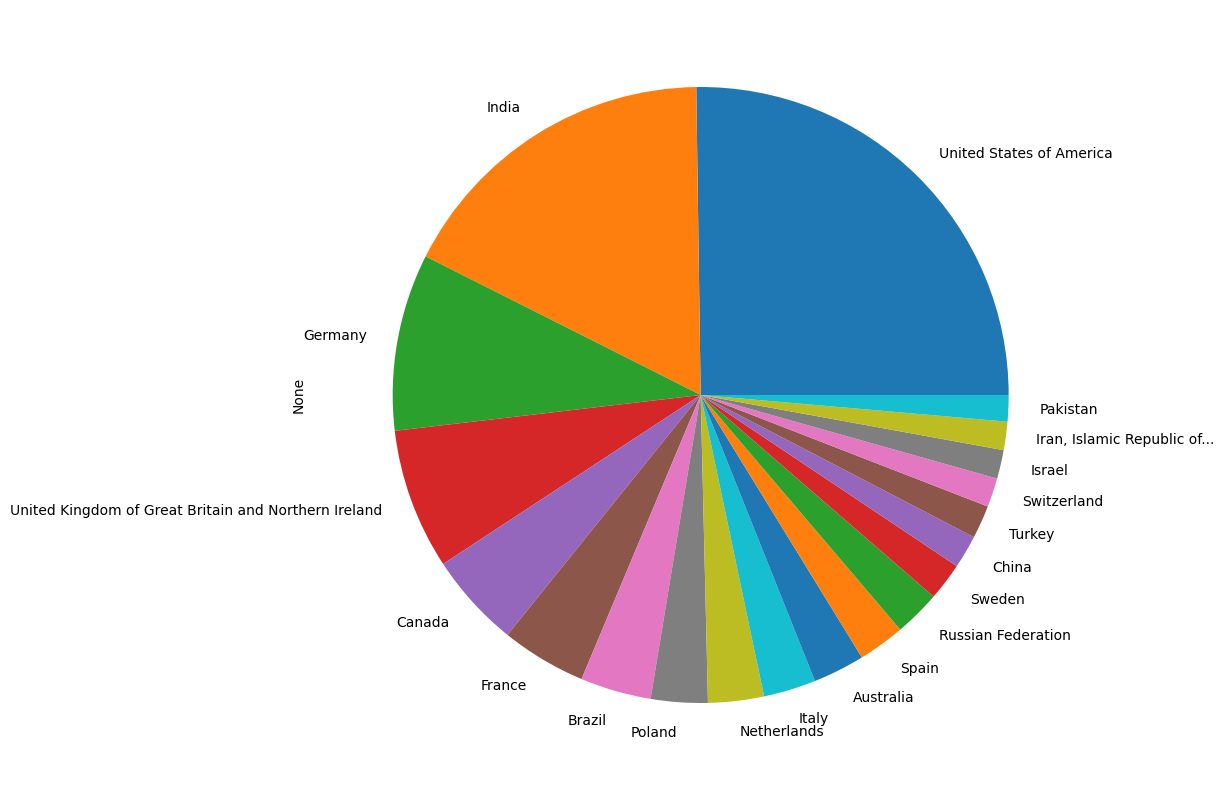

In [50]:
# 국가 상위 20개 파이 그래프 그리기
size_by_country.nlargest(20).plot.pie(figsize=(10,10))

이번엔 개발자들이 어떤 프로그래밍 언어를 가장 많이 사용하는지 확인해보자. LanguageHaveWorkedWith 열을 추출해보자.

In [51]:
# 프로그래밍 언어 데이터 추출
languages = revised_data["LanguageHaveWorkedWith"]

languages

0        C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift
1                                    JavaScript;Python
2                             Assembly;C;Python;R;Rust
3                                JavaScript;TypeScript
4                       Bash/Shell;HTML/CSS;Python;SQL
                             ...                      
83434                               Clojure;Kotlin;SQL
83435                                              NaN
83436                               Groovy;Java;Python
83437             Bash/Shell;JavaScript;Node.js;Python
83438           Delphi;Elixir;HTML/CSS;Java;JavaScript
Name: LanguageHaveWorkedWith, Length: 83439, dtype: object

출력결과를 확인해보면 세미클론(;)으로 구분된 프로그래밍 언어가 나열되어 있다. 이를 각 프로그래밍 언어 개별로 그룹화 하려면 각 프로그래밍 언어를 하나의 값으로 쪼개야한다. 이럴 때 사용하는 메서드는 문자열에서 사용할 수 있는 split() 메서드이다. split() 메서드의 인수에는 값을 구분할 수 있는 구분자가 들어간다.

In [53]:
# 데이터 문자열 변환 후 구분자(;)로 구분
languages = languages.str.split(";")

languages

0        [C++, HTML/CSS, JavaScript, Objective-C, PHP, ...
1                                     [JavaScript, Python]
2                           [Assembly, C, Python, R, Rust]
3                                 [JavaScript, TypeScript]
4                      [Bash/Shell, HTML/CSS, Python, SQL]
                               ...                        
83434                               [Clojure, Kotlin, SQL]
83435                                                  NaN
83436                               [Groovy, Java, Python]
83437            [Bash/Shell, JavaScript, Node.js, Python]
83438         [Delphi, Elixir, HTML/CSS, Java, JavaScript]
Name: LanguageHaveWorkedWith, Length: 83439, dtype: object

출력물을 확인해보면 단일 항목으로 보이던 값들이 여러 항목으로 이루어진 리스트 형식으로 변경된 것을 확인할 수 있다.

이제 리스트의 각 항목을 하나의 값으로 표현하기 위해 행으로 나누어 보자. 리스트의 항목을 행으로 나누는 메서드는 explode()이다.

In [54]:
# 리스트 항목을 행으로 나누기
explode_languages = languages.explode()

explode_languages

0                C++
0           HTML/CSS
0         JavaScript
0        Objective-C
0                PHP
            ...     
83438         Delphi
83438         Elixir
83438       HTML/CSS
83438           Java
83438     JavaScript
Name: LanguageHaveWorkedWith, Length: 443642, dtype: object

이제 그룹화하여 각 그룹의 크기로 이루어진 데이터를 만들어보자.

In [55]:
# 프로그래밍 별 응답 수 구하기
size_by_languages = explode_languages.groupby(explode_languages).size()

size_by_languages

LanguageHaveWorkedWith
APL              536
Assembly        4632
Bash/Shell     22385
C              17329
C#             22984
C++            20057
COBOL            437
Clojure         1552
Crystal          466
Dart            4965
Delphi          1731
Elixir          1438
Erlang           651
F#               804
Go              7879
Groovy          2479
HTML/CSS       46259
Haskell         1749
Java           29162
JavaScript     53587
Julia           1068
Kotlin          6866
LISP            1096
Matlab          3846
Node.js        27975
Objective-C     2310
PHP            18130
Perl            2028
PowerShell      8871
Python         39792
R               4185
Ruby            5569
Rust            5799
SQL            38835
Scala           2148
Swift           4204
TypeScript     24909
VBA             3847
Name: LanguageHaveWorkedWith, dtype: int64

이제 상위 10개 프로그래밍 언어를 파이 그래프로 나타내어 보자.

<AxesSubplot:ylabel='LanguageHaveWorkedWith'>

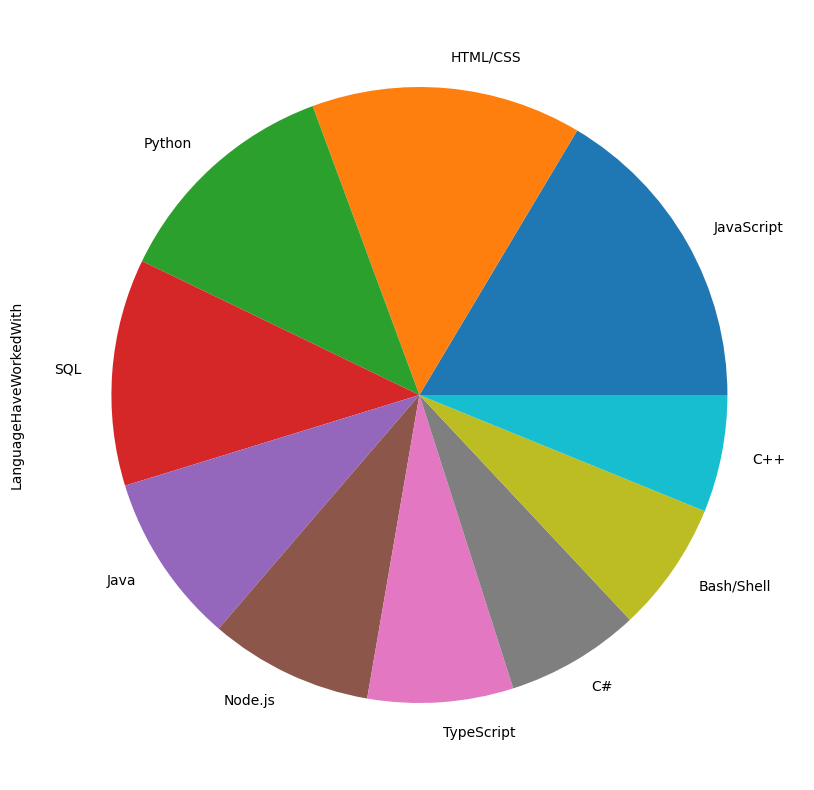

In [56]:
# 파이 그래프 그리기
size_by_languages.nlargest(10).plot.pie(figsize=(10,10))

위의 파이 그래프는 크기가 비슷한 파이 조각이 많으므로 각 파이가 차지하는 비율을 정확하게 표현하기 위해 백분율로 표기해보자. 백분율을 표기하려면 명명인수 autopct 인수에 백분율 표기 방식을 넣으면 된다. 자세한 표기 방식은 매트플랏랩 공식 사이트를 참조한다.

<AxesSubplot:ylabel='LanguageHaveWorkedWith'>

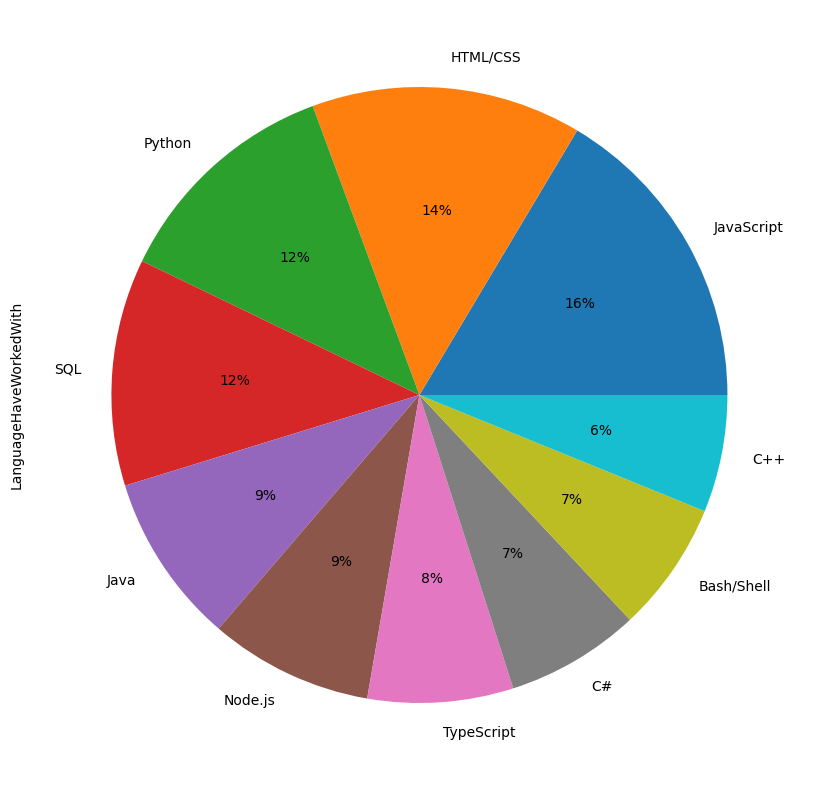

In [62]:
# 백분율 표기하기
size_by_languages.nlargest(10).plot.pie(figsize=(10,10), autopct='%1.0f%%')

기왕이면 가장 많은 개발자 연령대인 25~34세의 개발자들이 경험한 프로그래밍 언어 중 상위 10개를 추출해 그래프로 그리면 더 의미가 있을 것이다. 다음 소스코드를 실행해 확인해보자.

In [78]:
# 25~34세 연령대가 사용한 프로그래밍 언어 정보 추출
languages_for_25_34 = revised_data[revised_data.Age == '25-34 years old']["LanguageHaveWorkedWith"].str.split(";").explode()

languages_for_25_34

0                C++
0           HTML/CSS
0         JavaScript
0        Objective-C
0                PHP
            ...     
83436         Python
83437     Bash/Shell
83437     JavaScript
83437        Node.js
83437         Python
Name: LanguageHaveWorkedWith, Length: 166137, dtype: object

이제 상위 10개의 데이터만 추출해 백분율도 함께 표기하여 파이 그래프로 그려보자.

<AxesSubplot:ylabel='LanguageHaveWorkedWith'>

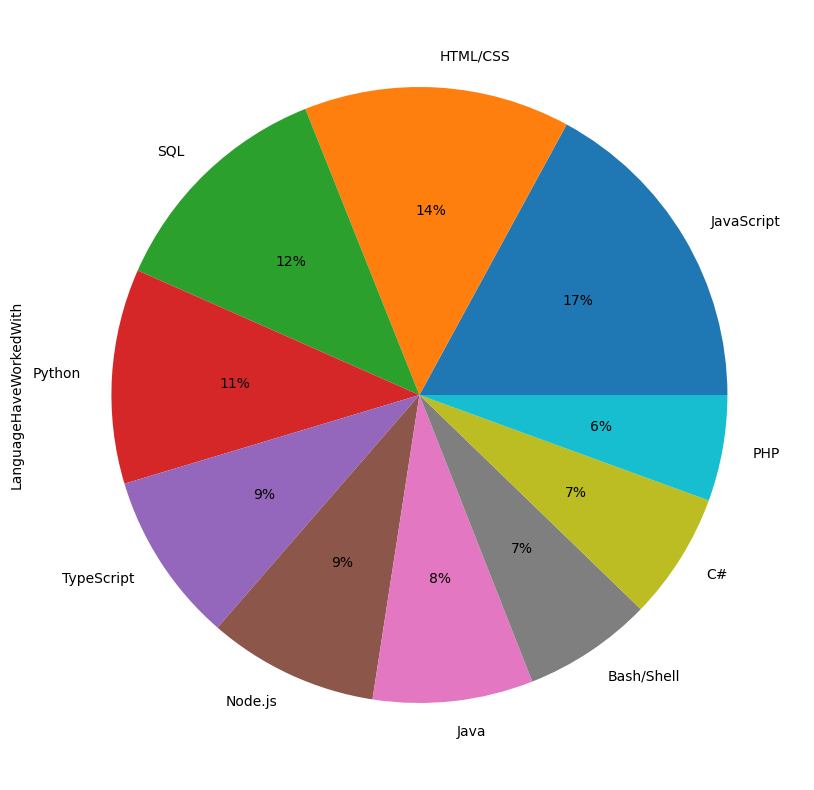

In [80]:
# 상위 10개 데이터 파이 그래프 그리기
languages_for_25_34.groupby(languages_for_25_34).size().nlargest(10).plot.pie(figsize=(10,10), autopct="%1.0f%%")

최종적으로 지금까지 그려본 그래프로 결론을 내리자면, 세계적으로 개발자가 많이 분포되어 있는 연령대는 25~34세 그리고 18~24세 연령대이고 개발자들이 가장 많이 일하고 있는 상위 국가들은 미국, 인도, 독일이 있다. 또한 개발자들이 가장 많이 사용하는 언어는 HTML/CSS, Javascript로 볼 수 있다. 따라서 앞으로 대학교 졸업생이 소프트웨어 엔지니어로써 해외취업을 준비한다면 HTML/CSS, Javascript로 웹 프로그래밍 개발 언어를 먼저 습득한 후 미국, 인도, 독일 등의 취업시장을 공략해본다면 글로벌 소프트웨어 엔지니어로 일하는데 도움이 될 것으로 보인다.